In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import datasets

# Load Cifar 10 model

In [2]:
loaded_model = tf.keras.models.load_model('cifar10.h5')
loaded_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)             

In [ ]:
# Load test data
(_, _), (test_images, test_labels) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


1/1 [==============================] - 0s 319ms/step
This image #0  most likely belongs to ship with a 100.00 percent confidence.
1/1 [==============================] - 0s 24ms/step
This image #1  most likely belongs to ship with a 100.00 percent confidence.
1/1 [==============================] - 0s 24ms/step
This image #2  most likely belongs to automobile with a 100.00 percent confidence.
1/1 [==============================] - 0s 25ms/step
This image #3  most likely belongs to airplane with a 100.00 percent confidence.
1/1 [==============================] - 0s 23ms/step
This image #4  most likely belongs to automobile with a 100.00 percent confidence.


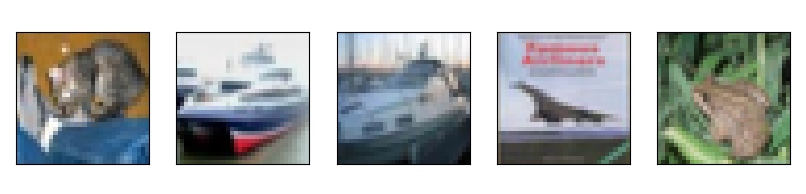

In [ ]:
import numpy as np

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i])
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[test_labels[i][0]],color='white')
    plt.title('TRUE TARGET #{}'.format(i),color='white')
    #change image dim
    img_arr = tf.expand_dims(test_images[i], 0)
    p = loaded_model.predict(img_arr)
    score = tf.nn.softmax(p)
    print(
        "This image #{}  most likely belongs to {} with a {:.2f} percent confidence."
        .format(i,class_names[np.argmax(score)], 100 * np.max(score))
    )
plt.show()

# Lets predict on a totally new image outside dataset, load 1 image from our dogs and cats

(500, 441, 3)


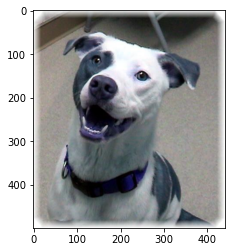

(32, 32, 3)


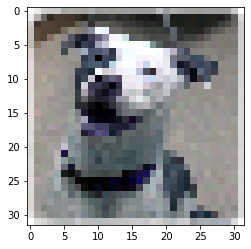

This image  most likely belongs to automobile with a 100.00 percent confidence.


In [ ]:
# import cv2
img= cv2.imread('/Volumes/GoogleDrive-108421540465873031280/My Drive/GL-AIML-Mentoring/ai-ml-explainers/My-way-NN/data/dogs_vs_cats/test/dogs/101.jpg')
print(img.shape)
plt.imshow(img)
plt.show()
img_height = 32
img_width = 32
res = cv2.resize(img,(img_height, img_width), interpolation = cv2.INTER_CUBIC)
print(res.shape)
plt.imshow(res)
plt.show()

img_arr = tf.expand_dims(res, 0)
p = loaded_model.predict(img_arr)
score = tf.nn.softmax(p)
print(
    "This image  most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

# Lets look at our model of flowers trained on GPU on 3k+ dataset

Question - we trained this on GPU - do we need to do anything for inference ?

In [ ]:
loaded_model = tf.keras.models.load_model('cnn-flowers-gpu-15epoc.h5')
loaded_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 180, 180, 3)       0         
_________________________________________________________________
rescaling (Rescaling)        (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 45, 45, 64)       

(2848, 3797, 3)


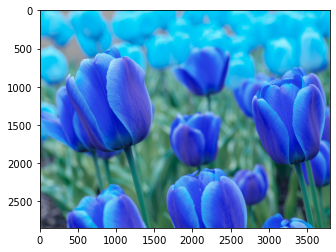

This image  most likely belongs to cat with a 66.45 percent confidence.


In [ ]:
img= cv2.imread('/Volumes/GoogleDrive-108421540465873031280/My Drive/GL-AIML-Mentoring/ai-ml-explainers/My-way-NN/data/images/tulip-test-2.jpeg')
print(img.shape)
plt.imshow(img)
plt.show()

# We did not needed the resize ???
img_arr = tf.expand_dims(res, 0)
p = loaded_model.predict(img_arr)
score = tf.nn.softmax(p)
print(
    "This image  most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

# Lets looks at a better model done by others.. -- MobileNetv2 trained on ImageNet 14m+ dataset

827392/817459 [==============================] - 0s 0us/step
(224, 224, 3)
(1, 224, 224, 3)


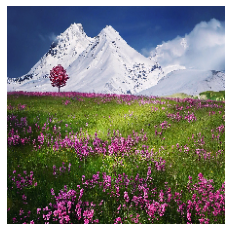

In [ ]:
# Load image again using keras utils
file = tf.keras.utils.get_file(
    "mountains.jpg",
    "https://storage.googleapis.com/gcptutorials.com/examples/mountains.jpg")
img = tf.keras.preprocessing.image.load_img(file, target_size=[224, 224])
plt.imshow(img)
plt.axis('off')

x = tf.keras.preprocessing.image.img_to_array(img)
print(x.shape)
x = tf.keras.applications.mobilenet.preprocess_input(
    x[tf.newaxis,...])
print(x.shape)

In [ ]:
labels_path = tf.keras.utils.get_file(
    'ImageNetLabels.txt',
    'https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
labels = np.array(open(labels_path).read().splitlines())
print(len(labels))

24576/10484 [======================================================================] - 0s 0us/step
1001


In [ ]:
# Create the base model from the pre-trained model MobileNet V2
mobilenetv2 = tf.keras.applications.MobileNetV2(weights='imagenet')
mobilenetv2.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_5[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
_______________________________________________________________________________

In [ ]:
# model = tf.keras.applications.MobileNetV2()
predictions = mobilenetv2(x)
print(predictions.shape)

top_5_classes_index = np.argsort(predictions)[0 , ::-1][:5]+1

print(top_5_classes_index)

top_5_classes = labels[top_5_classes_index]
print(top_5_classes)

(1, 1000)
[971 981 426 980 916]
['alp' 'volcano' 'barn' 'valley' 'yurt']


shape of new image  (2848, 3797, 3)


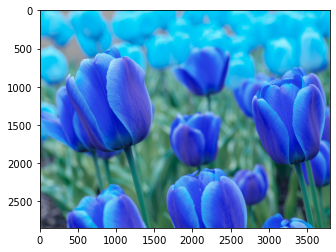

re-shape of new image  (224, 224, 3)
re-shape of new image after mobilenet preproces (1, 224, 224, 3)
[986 739 310 717 311]
predictions of top class --  ['daisy' 'pot' 'bee' 'picket fence' 'ant']


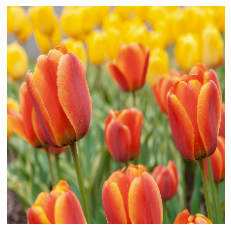

In [ ]:
img_path ='/Volumes/GoogleDrive-108421540465873031280/My Drive/GL-AIML-Mentoring/ai-ml-explainers/My-way-NN/data/images/tulip-test-2.jpeg'
img= cv2.imread(img_path)
print('shape of new image ',img.shape)
plt.imshow(img)
plt.show()

res = tf.keras.preprocessing.image.load_img(img_path, target_size=[224, 224])
res_x = tf.keras.preprocessing.image.img_to_array(res)
print('re-shape of new image ',res_x.shape)
res_x = tf.keras.applications.mobilenet.preprocess_input(
    res_x[tf.newaxis,...])
print('re-shape of new image after mobilenet preproces',res_x.shape)
plt.imshow(res)
plt.axis('off')
predictions = mobilenetv2(res_x)
# print(predictions.shape)
top_5_classes_index = np.argsort(predictions)[0 , ::-1][:5]+1
print(top_5_classes_index)
top_5_classes = labels[top_5_classes_index]
print('predictions of top class -- ',top_5_classes)

# Huggingface

In [ ]:
!pip install transformers
!pip install datasets

In [ ]:
# Load ResNET50 from https://huggingface.co/microsoft/resnet-50
from transformers import AutoFeatureExtractor, ResNetForImageClassification
import torch
from datasets import load_dataset

dataset = load_dataset("huggingface/cats-image")
image = dataset["test"]["image"][0]

feature_extractor = AutoFeatureExtractor.from_pretrained("microsoft/resnet-50")
model = ResNetForImageClassification.from_pretrained("microsoft/resnet-50")

inputs = feature_extractor(image, return_tensors="pt")

with torch.no_grad():
    logits = model(**inputs).logits

# model predicts one of the 1000 ImageNet classes
predicted_label = logits.argmax(-1).item()
print(model.config.id2label[predicted_label])


# Pytorch

In [ ]:
from torchvision.io import read_image
from torchvision.models import resnet50, ResNet50_Weights
import torchvision.transforms as T

img = read_image("../data/dogs_vs_cats/test/dogs/101.jpg")
img1 = T.ToPILImage()(img)
img1.show()

# Step 1: Initialize model with the best available weights
weights = ResNet50_Weights.DEFAULT
model = resnet50(weights=weights)
model.eval()

# Step 2: Initialize the inference transforms
preprocess = weights.transforms()

# Step 3: Apply inference preprocessing transforms
batch = preprocess(img).unsqueeze(0)

# Step 4: Use the model and print the predicted category
prediction = model(batch).squeeze(0).softmax(0)
class_id = prediction.argmax().item()
score = prediction[class_id].item()
category_name = weights.meta["categories"][class_id]
print(f"{category_name}: {100 * score:.1f}%")